In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=16

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x17f3d1de040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x17f77244040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380256

In [9]:
training_sample

380256

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380256, 16, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380256,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 16, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 16, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=190,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/190
2971/2971 [==============================] - 465s 154ms/step - loss: 0.5724 - accuracy: 0.7393 - val_loss: 0.5554 - val_accuracy: 0.7531
Epoch 2/190
2971/2971 [==============================] - 462s 156ms/step - loss: 0.5595 - accuracy: 0.7393 - val_loss: 0.5291 - val_accuracy: 0.7530
Epoch 3/190
2971/2971 [==============================] - 435s 146ms/step - loss: 0.5239 - accuracy: 0.7402 - val_loss: 0.4960 - val_accuracy: 0.7522
Epoch 4/190
2971/2971 [==============================] - 435s 147ms/step - loss: 0.5073 - accuracy: 0.7366 - val_loss: 0.4929 - val_accuracy: 0.7470
Epoch 5/190
2971/2971 [==============================] - 433s 146ms/step - loss: 0.5032 - accuracy: 0.7366 - val_loss: 0.4866 - val_accuracy: 0.7512
Epoch 6/190
2971/2971 [==============================] - 435s 146ms/step - loss: 0.5005 - accuracy: 0.7380 - val_loss: 0.4877 - val_accuracy: 0.7529
Epoch 7/190
2971/2971 [==============================] - 433s 146ms/step - loss: 0.4979 - accuracy: 0.7396

Epoch 56/190
2971/2971 [==============================] - 437s 147ms/step - loss: 0.4398 - accuracy: 0.7747 - val_loss: 0.4453 - val_accuracy: 0.7714
Epoch 57/190
2971/2971 [==============================] - 438s 147ms/step - loss: 0.4392 - accuracy: 0.7750 - val_loss: 0.4346 - val_accuracy: 0.7761
Epoch 58/190
2971/2971 [==============================] - 437s 147ms/step - loss: 0.4389 - accuracy: 0.7750 - val_loss: 0.4407 - val_accuracy: 0.7762
Epoch 59/190
2971/2971 [==============================] - 438s 147ms/step - loss: 0.4389 - accuracy: 0.7751 - val_loss: 0.4371 - val_accuracy: 0.7781
Epoch 60/190
2971/2971 [==============================] - 438s 147ms/step - loss: 0.4386 - accuracy: 0.7755 - val_loss: 0.4320 - val_accuracy: 0.7793
Epoch 61/190
2971/2971 [==============================] - 437s 147ms/step - loss: 0.4383 - accuracy: 0.7759 - val_loss: 0.4391 - val_accuracy: 0.7736
Epoch 62/190
2971/2971 [==============================] - 440s 148ms/step - loss: 0.4379 - accuracy:

2971/2971 [==============================] - 435s 146ms/step - loss: 0.4273 - accuracy: 0.7817 - val_loss: 0.4282 - val_accuracy: 0.7816
Epoch 111/190
2971/2971 [==============================] - 435s 147ms/step - loss: 0.4271 - accuracy: 0.7820 - val_loss: 0.4265 - val_accuracy: 0.7822
Epoch 112/190
2971/2971 [==============================] - 436s 147ms/step - loss: 0.4272 - accuracy: 0.7823 - val_loss: 0.4356 - val_accuracy: 0.7821
Epoch 113/190
2971/2971 [==============================] - 436s 147ms/step - loss: 0.4270 - accuracy: 0.7817 - val_loss: 0.4249 - val_accuracy: 0.7831
Epoch 114/190
2971/2971 [==============================] - 438s 147ms/step - loss: 0.4269 - accuracy: 0.7822 - val_loss: 0.4273 - val_accuracy: 0.7813
Epoch 115/190
2971/2971 [==============================] - 435s 146ms/step - loss: 0.4267 - accuracy: 0.7824 - val_loss: 0.4254 - val_accuracy: 0.7825
Epoch 116/190
2971/2971 [==============================] - 436s 147ms/step - loss: 0.4264 - accuracy: 0.7820

2971/2971 [==============================] - 437s 147ms/step - loss: 0.4208 - accuracy: 0.7850 - val_loss: 0.4255 - val_accuracy: 0.7797
Epoch 165/190
2971/2971 [==============================] - 438s 147ms/step - loss: 0.4207 - accuracy: 0.7850 - val_loss: 0.4263 - val_accuracy: 0.7848
Epoch 166/190
2971/2971 [==============================] - 440s 148ms/step - loss: 0.4206 - accuracy: 0.7854 - val_loss: 0.4240 - val_accuracy: 0.7841
Epoch 167/190
2971/2971 [==============================] - 438s 147ms/step - loss: 0.4204 - accuracy: 0.7850 - val_loss: 0.4231 - val_accuracy: 0.7847
Epoch 168/190
2971/2971 [==============================] - 438s 148ms/step - loss: 0.4203 - accuracy: 0.7853 - val_loss: 0.4263 - val_accuracy: 0.7831
Epoch 169/190
2971/2971 [==============================] - 437s 147ms/step - loss: 0.4203 - accuracy: 0.7850 - val_loss: 0.4232 - val_accuracy: 0.7831
Epoch 170/190
2971/2971 [==============================] - 437s 147ms/step - loss: 0.4202 - accuracy: 0.7850

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 49s 16ms/step


In [25]:
stop=t.time()-start
print(stop)

83297.95506286621


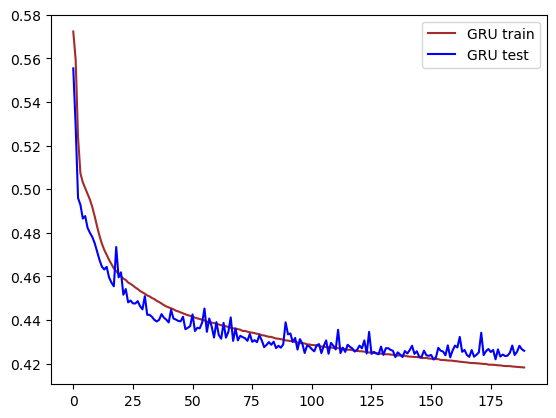

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95065, 1)

In [29]:
pred_y

array([[0.00200884],
       [0.00257719],
       [0.00055036],
       ...,
       [0.03630038],
       [0.0382525 ],
       [0.03984468]], dtype=float32)

In [30]:
pred_y=np.reshape(pred_y,95065)

0.14257986031452477
0.2332935917619552
0.37759748451826947
0.2810345755328642


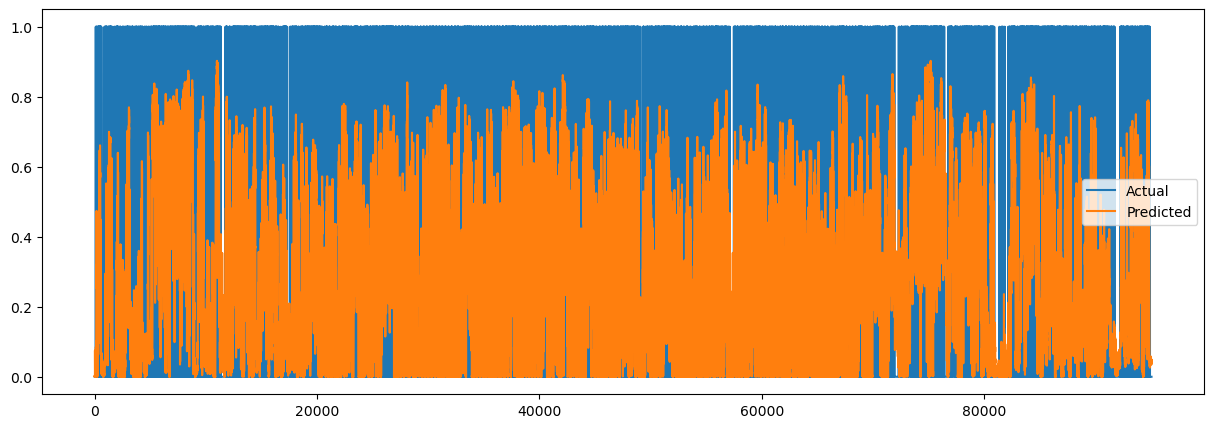

In [31]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [32]:
np.shape(train_X)

(380256, 16, 15)

In [33]:
np.shape(train_y)

(380256, 1)

In [34]:
np.shape(test_X)

(95065, 16, 15)

In [35]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 203s 14ms/step


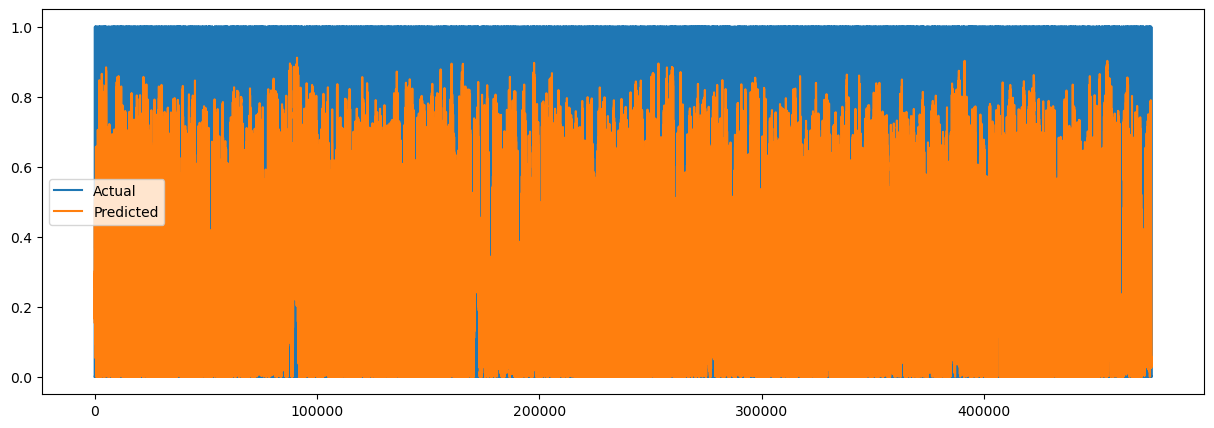

In [36]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

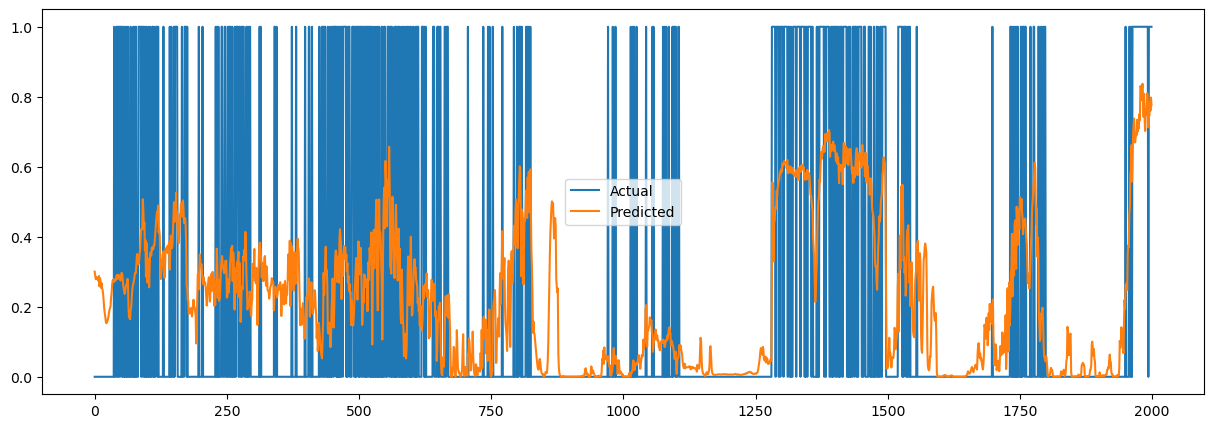

In [37]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [38]:
print(sum(tes)/len(tes))

[0.25794568]


In [39]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.59963892]
[0.83726079]
total acc [0.78547971]


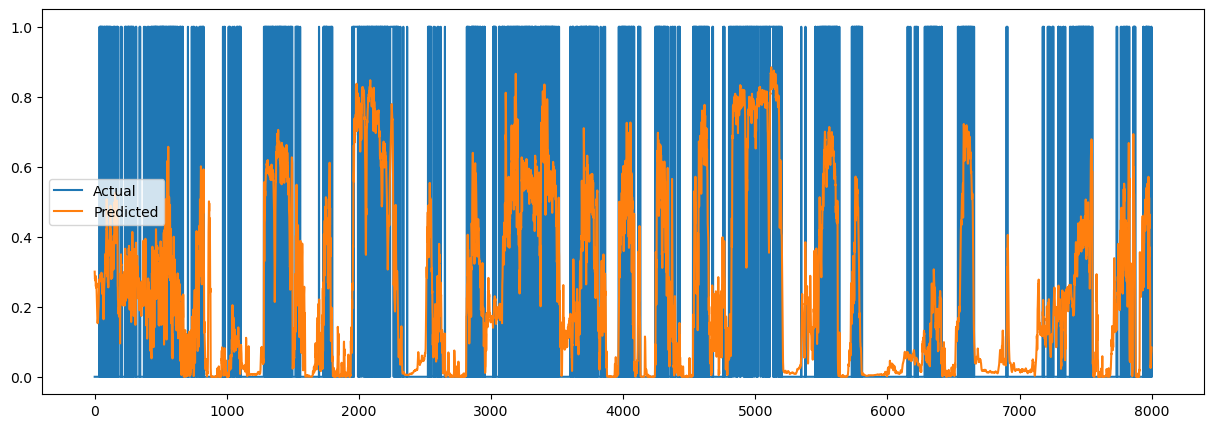

In [40]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

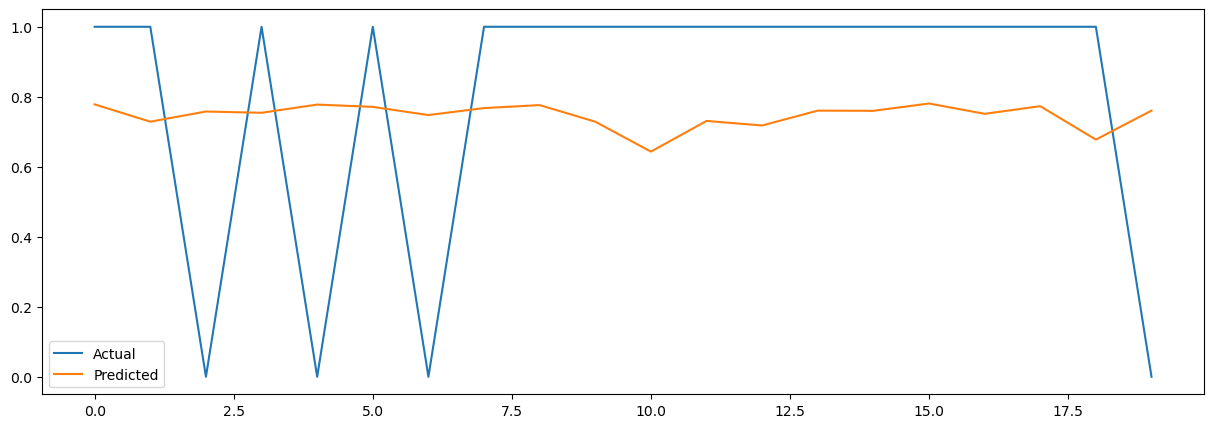

In [41]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

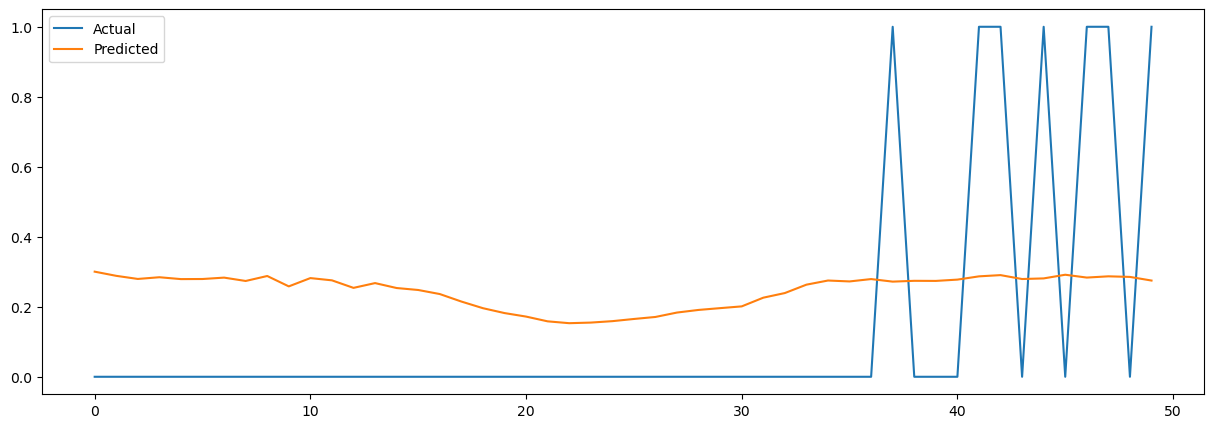

In [42]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

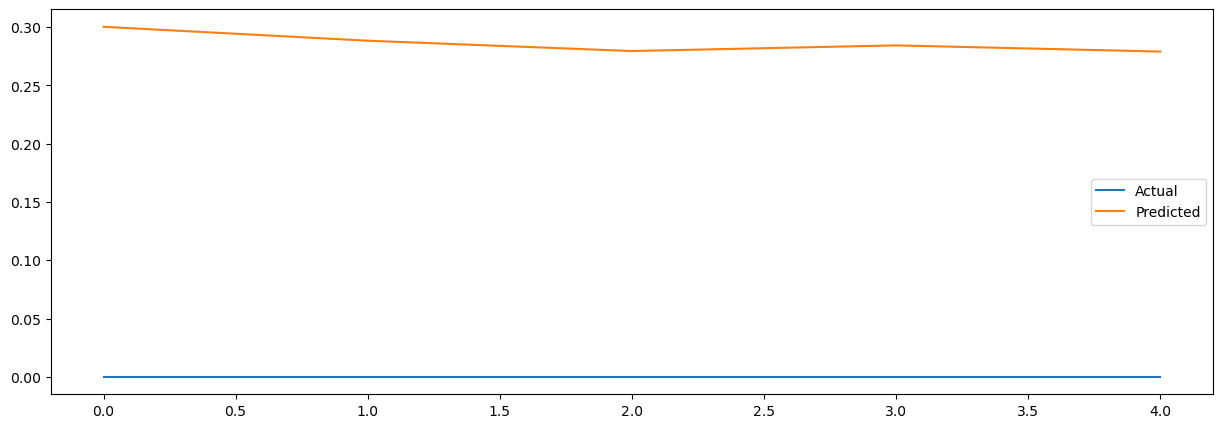

In [43]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()